# Data for plots in 
# Inhibition stabilization is a widespread property of cortical networks

This document shows how to read data from npz files and plot population responses

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats

# Population response in different recordings 

In the panel below, change the variable idx_rec to see responses from different recordings

Values from 0 to 4 of idx_rec corresponds to 

['V1','M1M2','S1','PV(viral)','PV(transgenic)','V1 before Anesthesia','V1 after Anesthesia']

These data are used for figure 2, 4, 5, 6 and 8

the npz files used also contains information of each cell 

'bradleyRating': estimate of the isolation of single unit done in spike sorting (only single units are included here and in the paper)

'initialSlope': measured slope of single cell response to laser at baseline

'SNR': Signal to noise ratio of waveform




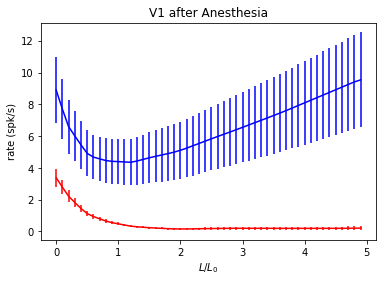

In [5]:
file_name = ['V1_data.npz','M1M2_data.npz','S1_data.npz',
             'PVChronos_data.npz','PVReacher_data.npz',
             'V1_data_befor_anest.npz','V1_data_after_anest.npz']

title=['V1','M1M2','S1',
       'PVChronos (viral)','PVReacher (transgenic)',
       'V1 before Anesthesia','V1 after Anesthesia']

data_dir = './data'

idx_rec=6;
npzfile = np.load(Path(data_dir)/file_name[idx_rec])
# to see elements in the file
#npzfile.files

L=npzfile['powers'];
mask=npzfile['isInhibitory']==0
r_E=np.mean(npzfile['rates'][mask,:],axis=0)
SEM_r_E=stats.sem(npzfile['rates'][mask,:],axis=0)

mask=npzfile['isInhibitory']==1
r_I=np.mean(npzfile['rates'][mask,:],axis=0)
SEM_r_I=stats.sem(npzfile['rates'][mask,:],axis=0)

plt.title(title[idx_rec])
plt.errorbar(L,r_E,SEM_r_E,c='r')
plt.errorbar(L,r_I,SEM_r_I,c='b')
plt.xlabel(r'$L/L_0$');
plt.ylabel(r'rate (spk/s)');


# Population response in deep sites

Notation as in the previous panel with the addition of a variable 'depth'; this referes to the shank number (1-8, 1 being the most superficial) in the recording.
Units were considered in deep layers if the shanks number was higher then 3;

These data are used for figure 7



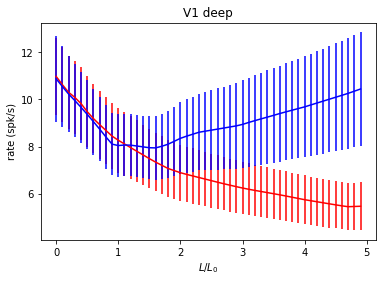

In [8]:
file_name = ['V1_data_deep.npz','M1M2_data_deep.npz','S1_data_deep.npz']

title=['V1 deep','M1M2 deep','S1 deep',]


idx_rec=0;
npzfile = np.load(Path(data_dir)/file_name[idx_rec])
mask_depth=npzfile['depth']>3
# to see elements in the file
#npzfile.files


L=npzfile['powers'];
mask=(npzfile['isInhibitory']==0)&mask_depth
r_E=np.mean(npzfile['rates'][mask,:],axis=0)
SEM_r_E=stats.sem(npzfile['rates'][mask,:],axis=0)

mask=(npzfile['isInhibitory']==1)&mask_depth
r_I=np.mean(npzfile['rates'][mask,:],axis=0)
SEM_r_I=stats.sem(npzfile['rates'][mask,:],axis=0)

plt.title(title[idx_rec])
plt.errorbar(L,r_E,SEM_r_E,c='r')
plt.errorbar(L,r_I,SEM_r_I,c='b')
plt.xlabel(r'$L/L_0$');
plt.ylabel(r'rate (spk/s)');



# Population dynamics in V1 

Response as a function of time of units recorded in V1.

These data are used for figure 3 and 4




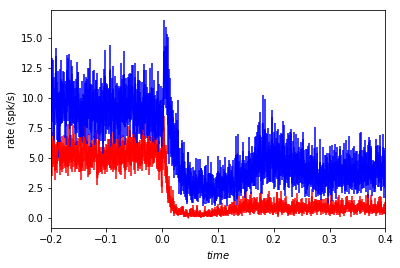

In [156]:
file_name = ['dynamics_E.npz','dynamics_I.npz']

time_ligth_onset=0.02 

idx_experiment=0;
npzfile = np.load(file_name[idx_experiment])
t=npzfile['t'];
t=t-time_ligth_onset 
mask=t!=0 # remove artifact at laser onset, 1 timebin (1 ms) removed

r_E=np.mean(npzfile['rate'][:,mask],axis=0)
SEM_r_E=stats.sem(npzfile['rate'][:,mask],axis=0)
idx_experiment=1;
npzfile = np.load(file_name[idx_experiment])

r_I=np.mean(npzfile['rate'][:,mask],axis=0)
SEM_r_I=stats.sem(npzfile['rate'][:,mask],axis=0)


#plt.title(title[idx_experiment])
plt.errorbar(t[mask],r_E,SEM_r_E,c='r')
plt.errorbar(t[mask],r_I,SEM_r_I,c='b')
plt.xlabel(r'$time$');
plt.ylabel(r'rate (spk/s)');
plt.xlim([-0.2,0.4]);
#plt.ylim([0,15])

